In [299]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import datetime
import pandas as pd
import sqlite3
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

In [300]:
def convert_timestamp(time):
    time_str = str(time)
    return pd.Timestamp(year = int("20"+time_str[0:2]), 
                             month = int(time_str[2:4]), 
                             day = int(time_str[4:6]), 
                             hour = int(time_str[6:8]), 
                             minute = int(time_str[8:10]), 
                             second = int(time_str[10:12]))

def get_last(N, con):
    """ Fetches N-hours ago to now"""
    df = pd.read_sql_query("SELECT * FROM data ORDER BY TIMESTAMP DESC LIMIT " + str(N*3600), con=con)
    df["TIMESTAMP"] =df["TIMESTAMP"].apply(convert_timestamp)
    df.set_index("TIMESTAMP", inplace=True)
    return df

In [301]:
time = 11.0 #h

In [302]:
conn = sqlite3.connect("/home/pi/wattWatcher/energy.db")

In [303]:
df=get_last(time, conn)

## One minute intervals

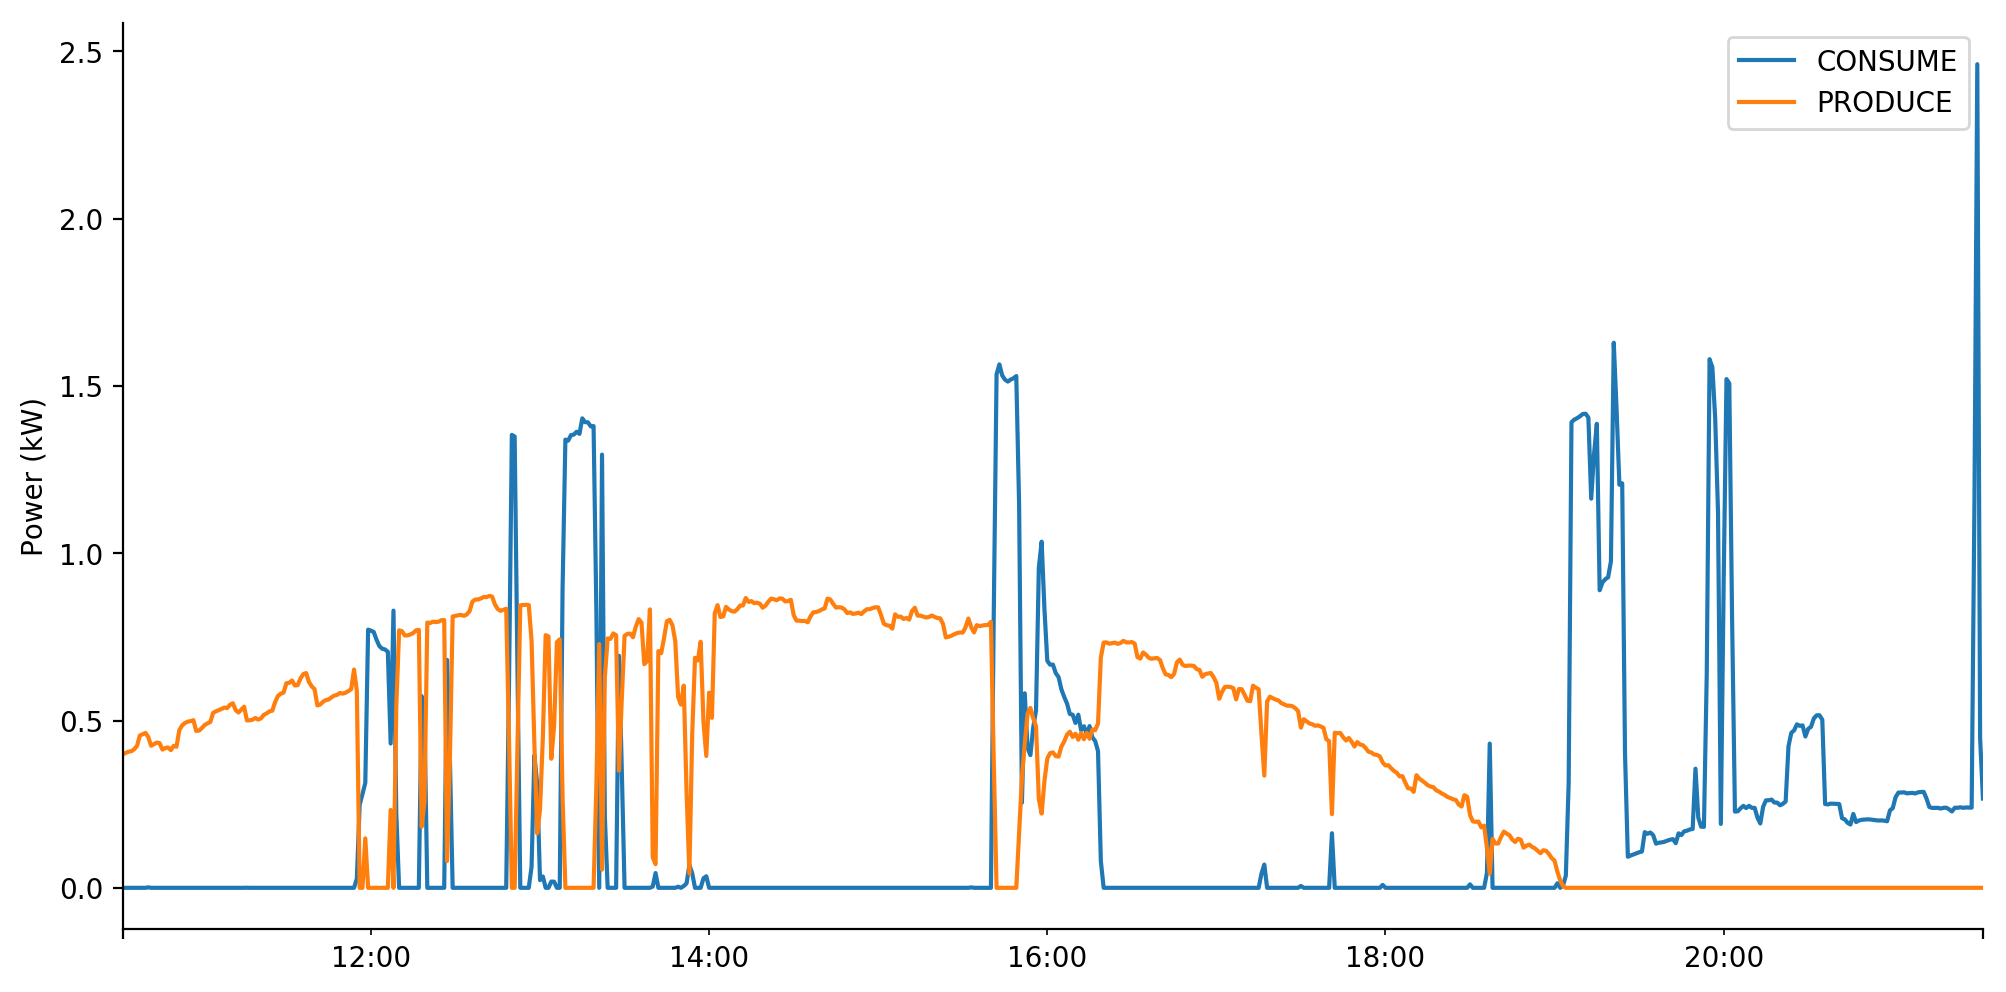

In [304]:
dfs = df.resample("1T").mean()
ax = dfs.plot(y=["CONSUME", "PRODUCE"], ylabel="Power (kW)", xlabel="" , figsize=(12,6))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

## One second intervals

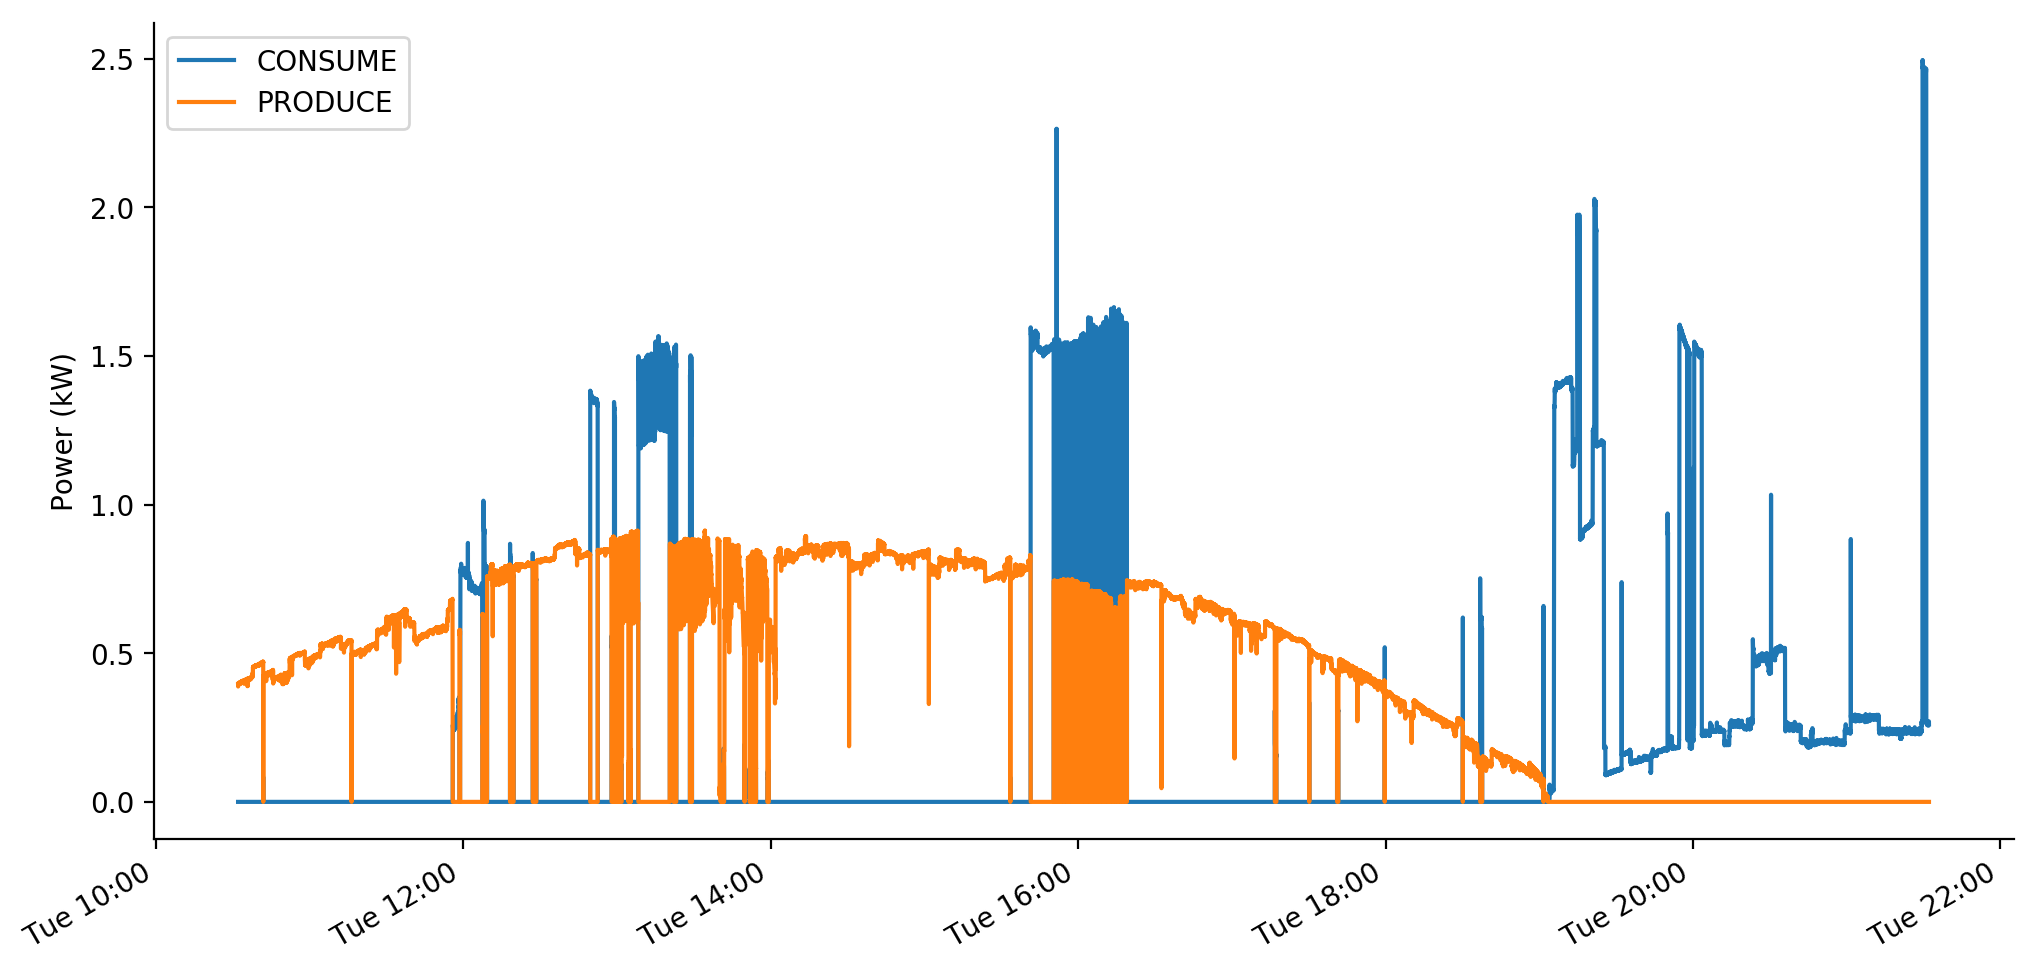

In [305]:
ax = df.plot(y=["CONSUME", "PRODUCE"], ylabel="Power (kW)", xlabel="" , figsize=(12,6))
date_format = mpl_dates.DateFormatter('%a %H:%M')
ax.xaxis.set_major_formatter(date_format)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()